# Загрузка библиотек

In [1151]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных

# Загрузка данных

In [1152]:
#data_raw = pd.read_csv('/kaggle/input/airplane-crashes-since-1908/Airplane_Crashes_and_Fatalities_Since_1908.csv')
data_raw = pd.read_csv("https://raw.githubusercontent.com/ShaldonS/Machine-Learning-Course/main/Airplane_Crashes.csv")
#from google.colab import files
#uploaded = files.upload()


In [1153]:
#import io
#data_raw = pd.read_csv(io.BytesIO(uploaded['Airplane_Crashes.csv']))

In [1154]:
data_raw.shape

(5268, 13)

In [1155]:
data_raw

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [1156]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


#О датасете

**Описание:** Полная история авиакатастроф по всему миру, с 1908 года по 2009 год.

**Колонки:**
- `Date` - дата крушения
- `Time` - время
- `Location` - место крушения
- `Operator` - оператор
- `Flight` - номер рейса
- `Route` - маршрут	(до аварии)
- `Type`- 	тип самолета
- `Registration`- номер регистрации	
- `cn/In` - строительный или серийный номер 
- `Aboard` - число людей на борту	
- `Fatalities` - смертельные случаи
- `Ground` - 	погибло во время приземления
- `Summary` - общее описание

In [1157]:
data_raw.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [1158]:
percent_missing = data_raw.isnull().sum() * 100 / len(data_raw)
missing_value_df = pd.DataFrame({'column_name': data_raw.columns,
                                 'percent_missing': percent_missing})
missing_value_df.mean() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


percent_missing    14.891069
dtype: float64

In [1159]:
data_raw.corr()

,Aboard,Fatalities,Ground
Aboard,1.000000,0.757172,0.023241
Fatalities,0.757172,1.000000,0.035170
Ground,0.023241,0.035170,1.000000


# Выбросы

In [1160]:
data_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Aboard,5246.0,27.554518,43.076711,0.0,5.0,13.0,30.0,644.0
Fatalities,5256.0,20.068303,33.199952,0.0,3.0,9.0,23.0,583.0
Ground,5246.0,1.608845,53.987827,0.0,0.0,0.0,0.0,2750.0


In [1161]:
data_raw.quantile(0.99)

Aboard        215.65
Fatalities    158.45
Ground         13.55
Name: 0.99, dtype: float64

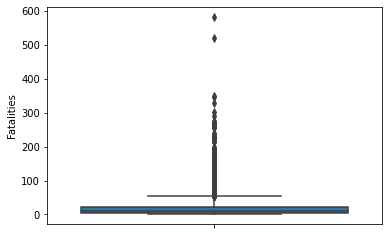

In [1162]:
sns.boxplot(y = "Fatalities", data=data_raw)

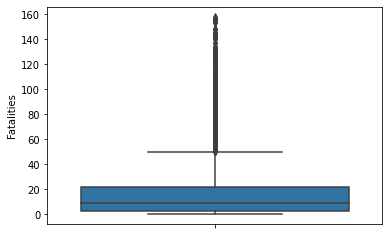

In [1163]:
data = data_raw.copy()
rows_to_drop = data[(data['Fatalities'] > data['Fatalities'].quantile(0.99))].index
data = data.drop(rows_to_drop)

sns.boxplot(y = "Fatalities", data=data)

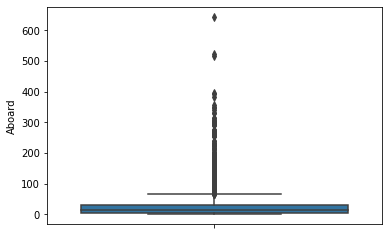

In [1164]:
sns.boxplot(y = "Aboard", data=data_raw)

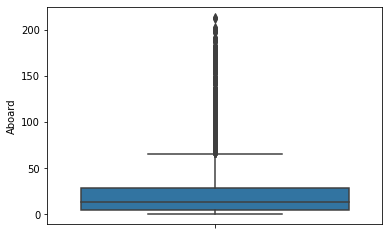

In [1165]:
data = data_raw.copy()
rows_to_drop = data[(data['Aboard'] > data['Aboard'].quantile(0.99))].index
data = data.drop(rows_to_drop)

sns.boxplot(y = "Aboard", data=data)

# Графики

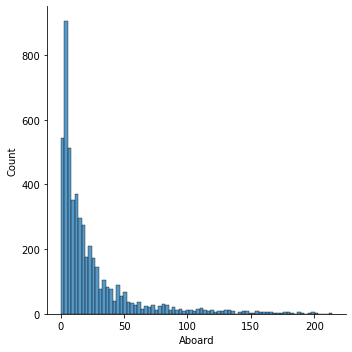

In [1166]:
sns_plot = sns.displot(data["Aboard"])

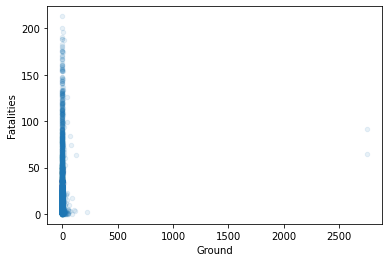

In [1167]:
data.plot(x="Ground", y="Fatalities", kind="scatter", alpha = 0.1)
plt.show() 

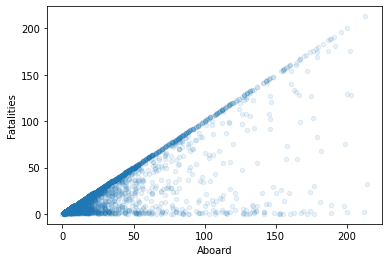

In [1168]:
data.plot(x="Aboard", y="Fatalities", kind="scatter", alpha = 0.1)
plt.show() 

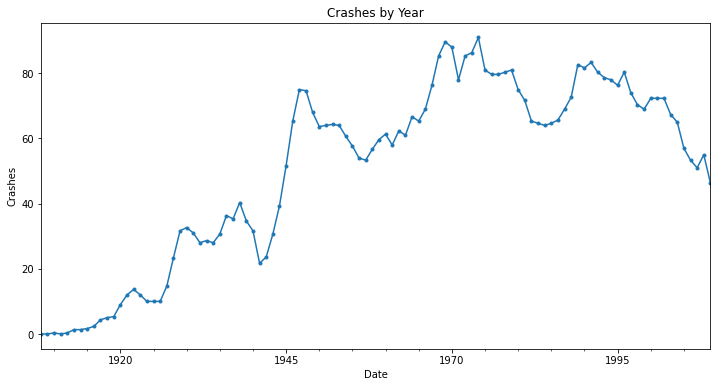

In [1169]:
data['Date']=pd.DatetimeIndex(data['Date'])
df_date_index=data.set_index('Date')

crashed_by_year=df_date_index.resample('1y').size().rolling(3).mean().fillna(0)
crashed_by_year.plot(figsize=[12, 6], title='Crashes by Year', ylabel='Crashes', marker=".")

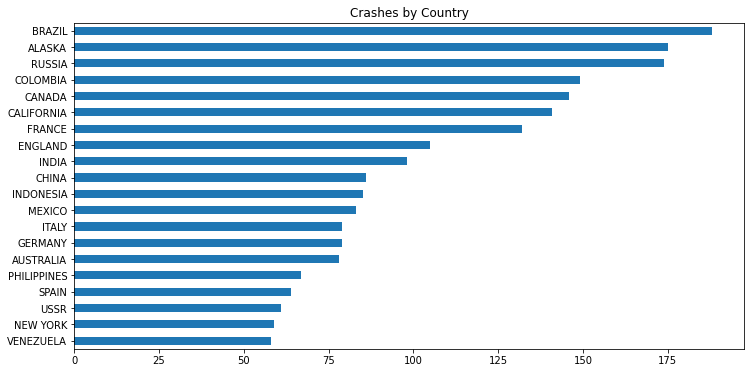

In [1170]:
data['Location Country']  = data['Location'].str.split(',').str[-1].str.strip().str.upper()

data['Location Country'].value_counts().head(20).sort_values().plot( kind='barh',figsize=[12, 6], title='Crashes by Country' )

data = data.drop(columns='Location Country')

# Работа с датасетом

In [1171]:
data.isnull().sum()

Date               0
Time            2215
Location          20
Operator          18
Flight #        4192
Route           1705
Type              27
Registration     334
cn/In           1226
Aboard            22
Fatalities        12
Ground            22
Summary          389
dtype: int64

Видим, что колонка Flight содержит много пустых значений - избавимся от нее.

In [1172]:
data = data.drop(columns='Flight #')

Избавимся также от колонок, не несущих большого смысла

In [1173]:
data = data.drop(columns='Summary')
data = data.drop(columns='cn/In')

In [1174]:
data['Ground'].value_counts()

0.0       4979
1.0         52
2.0         25
3.0         21
4.0         15
8.0         10
5.0          9
7.0          8
6.0          6
11.0         5
22.0         5
13.0         4
24.0         3
10.0         3
44.0         3
20.0         3
14.0         2
2750.0       2
30.0         2
12.0         2
19.0         2
47.0         2
52.0         2
70.0         2
54.0         1
18.0         1
45.0         1
16.0         1
35.0         1
50.0         1
23.0         1
225.0        1
125.0        1
75.0         1
15.0         1
32.0         1
49.0         1
9.0          1
40.0         1
36.0         1
113.0        1
107.0        1
33.0         1
87.0         1
31.0         1
63.0         1
17.0         1
37.0         1
58.0         1
85.0         1
Name: Ground, dtype: int64

In [1175]:
data.loc[(data.Ground > 0), 'Ground'] = 1
data['Ground'].value_counts()

0.0    4979
1.0     214
Name: Ground, dtype: int64

Будем считать, что если число погибших на земле больше 0 (то есть, погибшие есть), то значение равно 1. Если погибших нет, значение равно 0.

In [1176]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Time', 'Location', 'Operator', 'Route', 'Type', 'Registration']
['Date', 'Aboard', 'Fatalities', 'Ground']


In [1177]:
data.median(axis = 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Aboard        13.0
Fatalities     9.0
Ground         0.0
dtype: float64

Заполним пропущенные значения числовых признаков медианными значениями

In [1178]:
data = data.fillna(data.median(axis = 0), axis = 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [1179]:
data[numerical_columns].count(axis = 0)

Date          5215
Aboard        5215
Fatalities    5215
Ground        5215
dtype: int64

In [1180]:
data[categorical_columns].count(axis = 0)

Time            3000
Location        5195
Operator        5197
Route           3510
Type            5188
Registration    4881
dtype: int64

In [1181]:
data.describe(include = [object])

,Time,Location,Operator,Route,Type,Registration
count,3000,5195,5197,3510,5188,4881
unique,995,4270,2468,3202,2416,4853
top,15:00,"Moscow, Russia",Aeroflot,Training,Douglas DC-3,49
freq,32,15,179,81,334,3


In [1182]:
data.isnull().sum()

Date               0
Time            2215
Location          20
Operator          18
Route           1705
Type              27
Registration     334
Aboard             0
Fatalities         0
Ground             0
dtype: int64

Заменим пропущенные значения категориальных признаков на значения моды

In [1183]:
data["Location"] = data["Location"].fillna(data["Location"].mode()[0], axis=0)
data["Time"] = data["Time"].fillna(data["Time"].mode()[0], axis=0)
data["Operator"] = data["Operator"].fillna(data["Operator"].mode()[0], axis=0)
data["Route"] = data["Route"].fillna(data["Route"].mode()[0], axis=0)
data["Type"] = data["Type"].fillna(data["Type"].mode()[0], axis=0) 

In [1184]:
data[categorical_columns].count(axis = 0)

Time            5215
Location        5215
Operator        5215
Route           5215
Type            5215
Registration    4881
dtype: int64

In [1185]:
data[numerical_columns].count(axis = 0)

Date          5215
Aboard        5215
Fatalities    5215
Ground        5215
dtype: int64

# Векторизация

In [1186]:
text_columns = categorical_columns.copy()
print(text_columns)

['Time', 'Location', 'Operator', 'Route', 'Type', 'Registration']


Сделаем колонки Time и Date числовыми

In [1187]:
for i in range(len(data['Time'])) :
  if data['Time'].iloc[i][0] == 'c':
    data['Time'].iloc[i] = data['Time'].iloc[i][2:]
  try:
    data['Time'].iloc[i] = float(data['Time'].iloc[i].replace(":",""))
  except:
    data['Time'].iloc[i] = float(data['Time'].iloc[i].replace("'",""))

data['Time'] = data['Time'].astype('float64')
data['Date'] = data['Date'].astype('int64')

data['Time'].describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  # Remove the CWD from sys.path while we load stuff.


count     5215.000000
mean      1391.117047
std        487.707630
min          0.000000
25%       1210.000000
50%       1500.000000
75%       1500.000000
max      11420.000000
Name: Time, dtype: float64

Избавимся от выбросов

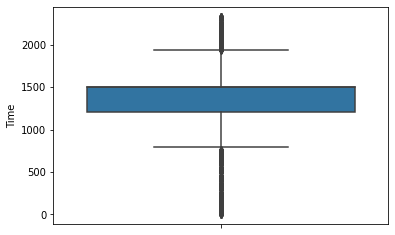

In [1188]:
rows_to_drop = data[(data['Time'] > data['Time'].quantile(0.99))].index
data = data.drop(rows_to_drop)

sns.boxplot(y = "Time", data=data)

Приведем текстовые признаки к числовым

In [1189]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

data_new = labelencoder.fit_transform(data['Location'].values)
data_new[:10]
data['Location'] = data_new.copy()

data_new = labelencoder.fit_transform(data['Operator'].values)
data_new[:10]
data['Operator'] = data_new.copy()

data_new = labelencoder.fit_transform(data['Route'].values)
data_new[:10]
data['Route'] = data_new.copy()

data_new = labelencoder.fit_transform(data['Type'].values)
data_new[:10]
data['Type'] = data_new.copy()

data_new = labelencoder.fit_transform(data['Registration'].values)
data_new[:10]
data['Registration'] = data_new.copy()

data

,Date,Time,Location,Operator,Route,Type,Registration,Aboard,Fatalities,Ground
0,-1934150400000000000,1718.0,828,1550,814,2287,4808,2.0,1.0,0.0
1,-1813708800000000000,630.0,116,1561,2908,1029,4808,5.0,5.0,0.0
2,-1780012800000000000,1500.0,4103,1802,2956,991,4808,1.0,1.0,0.0
3,-1777075200000000000,1830.0,3325,1450,2956,2301,4808,20.0,14.0,0.0
4,-1773792000000000000,1030.0,2251,1450,2956,2303,4808,30.0,30.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5262,1241308800000000000,1200.0,2110,1576,2253,1863,1378,18.0,18.0,0.0
5263,1242777600000000000,630.0,2394,1461,1264,1696,607,112.0,98.0,1.0
5264,1243296000000000000,1500.0,2230,1976,1043,144,583,4.0,4.0,0.0
5266,1244332800000000000,830.0,2608,2096,1631,683,765,1.0,1.0,0.0


# Нормировка

Стандартизация

In [1190]:
columns_for_stand = ["Date", "Time", "Aboard", "Fatalities"]
data[columns_for_stand] = (data[columns_for_stand] - data[columns_for_stand].mean(axis=0))/data[columns_for_stand].std(axis=0)
data.describe()

,Date,Time,Location,Operator,Route,Type,Registration,Aboard,Fatalities,Ground
count,5166.000000,5.166000e+03,5166.000000,5166.000000,5166.000000,5166.000000,5166.000000,5.166000e+03,5.166000e+03,5166.000000
mean,0.000000,-1.650506e-16,2077.602981,1195.262679,2067.643631,1225.367209,2555.057685,1.650506e-17,-1.650506e-17,0.041425
std,1.000000,1.000000e+00,1236.366053,705.686570,983.006601,647.131909,1468.789444,1.000000e+00,1.000000e+00,0.199290
min,-2.809028,-2.997532e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-7.617353e-01,-7.001438e-01,0.000000
25%,-0.785192,-3.796006e-01,997.250000,593.000000,1226.250000,779.000000,1277.250000,-6.070527e-01,-5.873516e-01,0.000000
50%,0.060222,2.599520e-01,2054.500000,1248.500000,2457.500000,1146.000000,2566.500000,-3.595606e-01,-3.617674e-01,0.000000
75%,0.832837,2.599520e-01,3156.750000,1739.000000,2956.000000,1722.750000,3853.750000,1.354236e-01,1.269985e-01,0.000000
max,1.688398,2.062426e+00,4228.000000,2448.000000,3167.000000,2395.000000,4808.000000,5.858678e+00,7.308097e+00,1.000000


Нормировка к отрезку от 0 до 1 (label incoder) - кодировка текста



In [1191]:
OldMax = data['Location'].max()
OldMin = data['Location'].min()
NewMax = 1
NewMin = 0
OldRange = (OldMax - OldMin)
NewRange = (NewMax - NewMin)
for i in range(len( data['Location']) ):
  OldValue = data['Location'].iloc[i]
  NewValue = (((OldValue - OldMin) * NewRange) / OldRange) + NewMin
  data['Location'].iloc[i] = NewValue

data['Location'].describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


count    5166.000000
mean        0.491391
std         0.292423
min         0.000000
25%         0.235868
50%         0.485927
75%         0.746630
max         1.000000
Name: Location, dtype: float64

In [1192]:
OldMax = data['Operator'].max()
OldMin = data['Operator'].min()
NewMax = 1
NewMin = 0
OldRange = (OldMax - OldMin)
NewRange = (NewMax - NewMin)
for i in range(len( data['Operator']) ):
  OldValue = data['Operator'].iloc[i]
  NewValue = (((OldValue - OldMin) * NewRange) / OldRange) + NewMin
  data['Operator'].iloc[i] = NewValue

data['Operator'].describe()

count    5166.000000
mean        0.488261
std         0.288271
min         0.000000
25%         0.242239
50%         0.510008
75%         0.710376
max         1.000000
Name: Operator, dtype: float64

In [1193]:
OldMax = data['Route'].max()
OldMin = data['Route'].min()
NewMax = 1
NewMin = 0
OldRange = (OldMax - OldMin)
NewRange = (NewMax - NewMin)
for i in range(len( data['Route']) ):
  OldValue = data['Route'].iloc[i]
  NewValue = (((OldValue - OldMin) * NewRange) / OldRange) + NewMin
  data['Route'].iloc[i] = NewValue

data['Route'].describe()

count    5166.000000
mean        0.652871
std         0.310390
min         0.000000
25%         0.387196
50%         0.775971
75%         0.933375
max         1.000000
Name: Route, dtype: float64

In [1194]:
OldMax = data['Type'].max()
OldMin = data['Type'].min()
NewMax = 1
NewMin = 0
OldRange = (OldMax - OldMin)
NewRange = (NewMax - NewMin)
for i in range(len( data['Type']) ):
  OldValue = data['Type'].iloc[i]
  NewValue = (((OldValue - OldMin) * NewRange) / OldRange) + NewMin
  data['Type'].iloc[i] = NewValue

data['Type'].describe()

count    5166.000000
mean        0.511636
std         0.270201
min         0.000000
25%         0.325261
50%         0.478497
75%         0.719311
max         1.000000
Name: Type, dtype: float64

In [1195]:
OldMax = data['Registration'].max()
OldMin = data['Registration'].min()
NewMax = 1
NewMin = 0
OldRange = (OldMax - OldMin)
NewRange = (NewMax - NewMin)
for i in range(len( data['Registration']) ):
  OldValue = data['Registration'].iloc[i]
  NewValue = (((OldValue - OldMin) * NewRange) / OldRange) + NewMin
  data['Registration'].iloc[i] = NewValue

data['Registration'].describe()

count    5166.000000
mean        0.531418
std         0.305489
min         0.000000
25%         0.265651
50%         0.533798
75%         0.801529
max         1.000000
Name: Registration, dtype: float64

In [1196]:
data

,Date,Time,Location,Operator,Route,Type,Registration,Aboard,Fatalities,Ground
0,-2.809028,0.733373,0.195837,0.633170,0.257026,0.954906,1.000000,-0.699862,-0.662546,0.0
1,-2.638613,-1.629388,0.027436,0.637663,0.918219,0.429645,1.000000,-0.607053,-0.512157,0.0
2,-2.590935,0.259952,0.970435,0.736111,0.933375,0.413779,1.000000,-0.730799,-0.662546,0.0
3,-2.586779,0.976598,0.786424,0.592320,0.933375,0.960752,1.000000,-0.143005,-0.173781,0.0
4,-2.582133,-0.760726,0.532403,0.592320,0.933375,0.961587,1.000000,0.166360,0.427777,0.0
...,...,...,...,...,...,...,...,...,...,...
5262,1.683997,-0.391545,0.499054,0.643791,0.711399,0.777871,0.286606,-0.204878,-0.023391,0.0
5263,1.686075,-1.629388,0.566225,0.596814,0.399116,0.708142,0.126248,2.703154,2.984399,1.0
5264,1.686809,0.259952,0.527436,0.807190,0.329334,0.060125,0.121256,-0.637989,-0.549754,0.0
5266,1.688276,-1.195057,0.616840,0.856209,0.514998,0.285177,0.159110,-0.730799,-0.662546,0.0


# Разделение на тестовую и обучающую выборки

In [1197]:
from sklearn.model_selection import train_test_split

X = data.drop("Ground", axis=1)
y = data["Ground"]
X.shape, y.shape

X = X.to_numpy()


In [1198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N2_train = y_train.shape 
N2_test = y_test.shape 

print(N_train, N_test, N2_train, N2_test)

3616 1550 (3616,) (1550,)


Метод К-ближайших соседей

In [1199]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [1200]:
y_test_predict = knn.predict(X_test)
err_test = np.mean(y_test  != y_test_predict)
err_test

0.03806451612903226

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


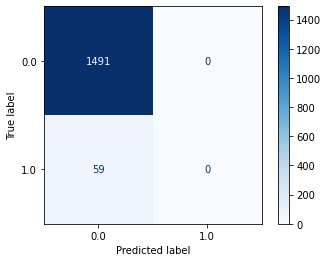

In [1201]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)

In [1202]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.04286359253761041 10


In [1203]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.04286504424778761 0.03806451612903226


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


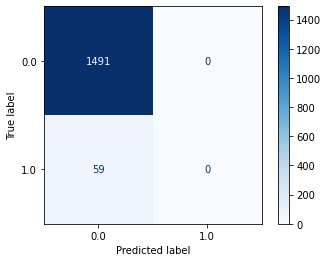

In [1204]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)

SVC

In [1205]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.04286504424778761 0.03806451612903226


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


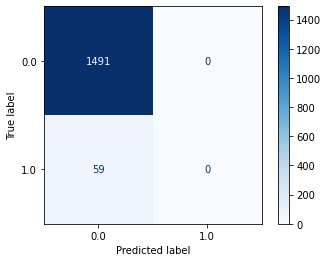

In [1206]:
plot_confusion_matrix(svc, X_test, y_test, cmap=plt.cm.Blues)

Random Forest

In [1207]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.03806451612903226


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


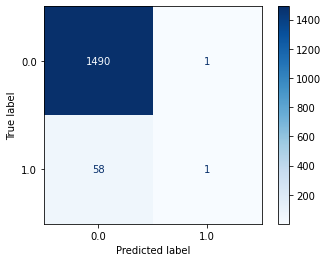

In [1208]:
plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Blues)

Extremely Randomized Trees

In [1209]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.03741935483870968


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


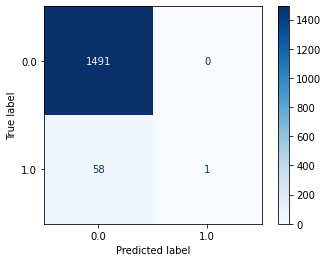

In [1210]:
plot_confusion_matrix(ert, X_test, y_test, cmap=plt.cm.Blues)

AdaBoost

In [1211]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.02461283185840708 0.05032258064516129


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


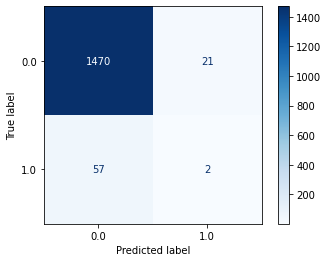

In [1212]:
plot_confusion_matrix(ada, X_test, y_test, cmap=plt.cm.Blues)

GBT

In [1213]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.0 0.04967741935483871


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


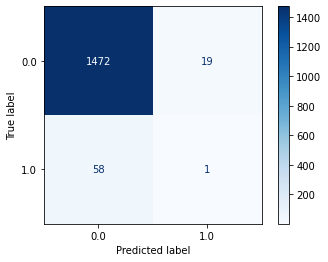

In [1214]:
plot_confusion_matrix(gbt, X_test, y_test, cmap=plt.cm.Blues)

# Вывод

In [1217]:
data['Ground'].value_counts()

0.0    4952
1.0     214
Name: Ground, dtype: int64

Как мы видим, число нулей гораздо больше единиц. Это не могло не повлиять на обучение - практически каждый метод отдает предпочтение выбору нуля.